In [1]:
from src.data import load_data
from src.models import util_model
from src.data import util
from pathlib import Path

In [2]:
dataset_path = "data/raw"
front_image = "trans020-1" 
target_image = load_data.read_image(dataset_path, front_image)

In [3]:
section_dict = util_model.detect_section(target_image)


0: 640x480 3 sections, 875.3ms
Speed: 3.7ms preprocess, 875.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


In [4]:
processed_sections = util.pre_process(section_dict)

In [5]:
text_dict = util_model.images_to_texts(processed_sections)

In [6]:
courses_df = util.make_course(text_dict)

In [7]:
post_courses_df = util.post_process(courses_df, processed_sections)

In [8]:
error_df = util.get_error(post_courses_df).reset_index(drop=True)
error_df

,ocr,numeric,section,id,name,unit,grade


In [9]:
export_df = post_courses_df[["id", "name", "unit", "grade"]]
export_df

,id,name,unit,grade
0,ท33101,ภาษาไทย,1.0,3.5
1,ส33101,สังคมศึกษา,1.0,3.0
2,ส33102,ประวัติศาสตร์ไทย,0.5,2.5
3,พ33103,สุขศึกษาและพลศึกษา,0.5,4.0
4,ศ33101,ศิลปะ,0.5,4.0
...,...,...,...,...
72,ว30261,การออกแบบและเทคโนโลยี,1.0,4.0
73,ว32202,ฟิสิกส์,1.5,2.5
74,ว32222,เคมี,1.0,4.0
75,ว32242,ชีววิทยา,1.5,3.0


In [10]:
load_data.export_df_to_csv("data/out/csv", front_image, export_df)

In [12]:
load_data.csv_to_json("data/out/json", "data/out/csv", front_image)

In [ ]:
from PIL import ImageDraw, ImageFont
import pandas as pd

In [ ]:
def add_alphabet_to_image(image, bounding_box, alphabet, font:str):
    # Open the original image
    draw = ImageDraw.Draw(image)

    # Calculate the width for the whitespace (assuming it is 1% of the image width)
    white_space_width = int(image.width * 0.01)

    # Load a font
    font_path = Path('data/font')/font/f"{font}.ttf"
    
    df = pd.DataFrame(bounding_box)
    font_size = df.height.median()*3
    # Extract the bounding box coordinates
    for i in range(len(bounding_box)):
        left, top, width, height, textt = bounding_box[i].values()

        # Set the font size to fit the bounding box
        font = ImageFont.truetype(font_path, font_size)
        
        # Calculate position for the alphabet
        text_x = white_space_width // 2
        text_y = top-height*(3/2)


        # Draw the alphabet on the image
        draw.text((text_x, text_y), alphabet, font=font, fill="black")
    return image


In [ ]:
bb = util.get_lines_pos(processed_sections[0])

In [ ]:
bb

[{'left': 122, 'top': 13, 'width': 44, 'height': 17, 'text': '2565'},
 {'left': 28, 'top': 36, 'width': 50, 'height': 15, 'text': '33101'},
 {'left': 27, 'top': 65, 'width': 50, 'height': 15, 'text': '33101'},
 {'left': 27, 'top': 94, 'width': 51, 'height': 15, 'text': '33102'},
 {'left': 28, 'top': 123, 'width': 52, 'height': 15, 'text': '33103'},
 {'left': 27, 'top': 153, 'width': 49, 'height': 15, 'text': '33101'},
 {'left': 26, 'top': 182, 'width': 50, 'height': 15, 'text': '33101'},
 {'left': 27, 'top': 211, 'width': 49, 'height': 15, 'text': '33201'},
 {'left': 26, 'top': 240, 'width': 52, 'height': 16, 'text': '33203'},
 {'left': 25, 'top': 270, 'width': 49, 'height': 15, 'text': '30291'},
 {'left': 24, 'top': 299, 'width': 50, 'height': 15, 'text': '33201'},
 {'left': 24, 'top': 328, 'width': 50, 'height': 15, 'text': '33221'},
 {'left': 24, 'top': 357, 'width': 50, 'height': 15, 'text': '33241'},
 {'left': 25, 'top': 386, 'width': 52, 'height': 15, 'text': '30206'},
 {'left': 

In [ ]:
bb

[{'left': 122, 'top': 13, 'width': 44, 'height': 17, 'text': '2565'},
 {'left': 28, 'top': 36, 'width': 50, 'height': 15, 'text': '33101'},
 {'left': 27, 'top': 65, 'width': 50, 'height': 15, 'text': '33101'},
 {'left': 27, 'top': 94, 'width': 51, 'height': 15, 'text': '33102'},
 {'left': 28, 'top': 123, 'width': 52, 'height': 15, 'text': '33103'},
 {'left': 27, 'top': 153, 'width': 49, 'height': 15, 'text': '33101'},
 {'left': 26, 'top': 182, 'width': 50, 'height': 15, 'text': '33101'},
 {'left': 27, 'top': 211, 'width': 49, 'height': 15, 'text': '33201'},
 {'left': 26, 'top': 240, 'width': 52, 'height': 16, 'text': '33203'},
 {'left': 25, 'top': 270, 'width': 49, 'height': 15, 'text': '30291'},
 {'left': 24, 'top': 299, 'width': 50, 'height': 15, 'text': '33201'},
 {'left': 24, 'top': 328, 'width': 50, 'height': 15, 'text': '33221'},
 {'left': 24, 'top': 357, 'width': 50, 'height': 15, 'text': '33241'},
 {'left': 25, 'top': 386, 'width': 52, 'height': 15, 'text': '30206'},
 {'left': 

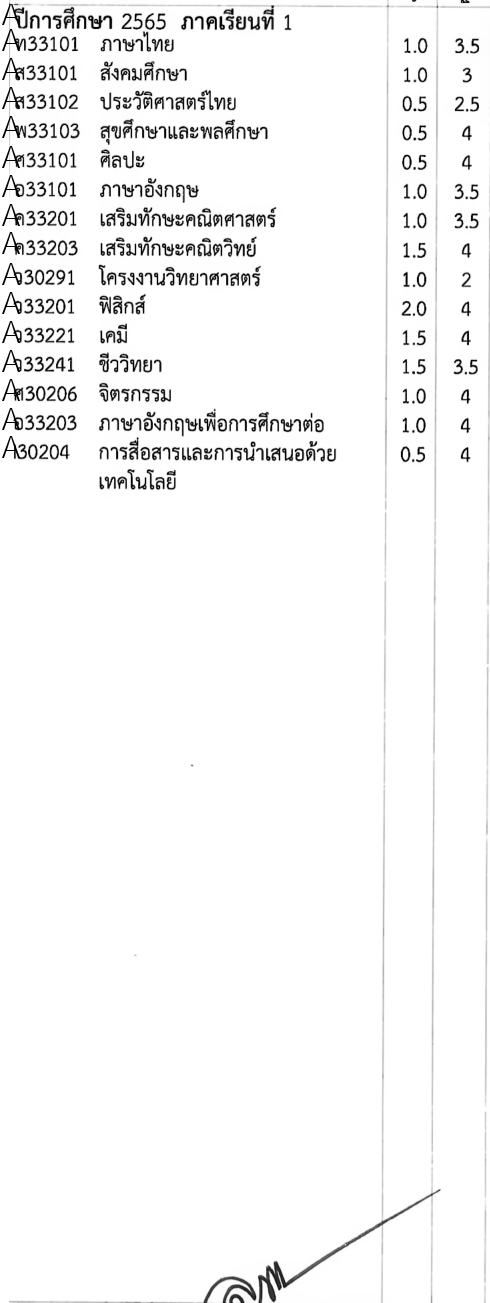

In [ ]:
add_alphabet_to_image(processed_sections[0], bb, 'A', 'THSarabunNew')